In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [26]:
df = pd.read_csv('weather_forecast_data.csv')
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [27]:
df['Rain'].replace(['no rain', 'rain'], [0, 1], inplace=True)
df.head()

C:\Users\2505z\AppData\Local\Temp\ipykernel_11560\3022752802.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rain'].replace(['no rain', 'rain'], [0, 1], inplace=True)
C:\Users\2505z\AppData\Local\Temp\ipykernel_11560\3022752802.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Rain'].r

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,1
1,27.879734,46.489704,5.952484,4.990053,992.614190,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,1
4,20.591370,96.858822,4.643921,47.676444,980.825142,0


In [28]:
df.isna().sum()

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 117.3 KB


In [30]:
df_num = df.select_dtypes('float64')

In [31]:
df_num.head()
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
dtypes: float64(5)
memory usage: 97.8 KB


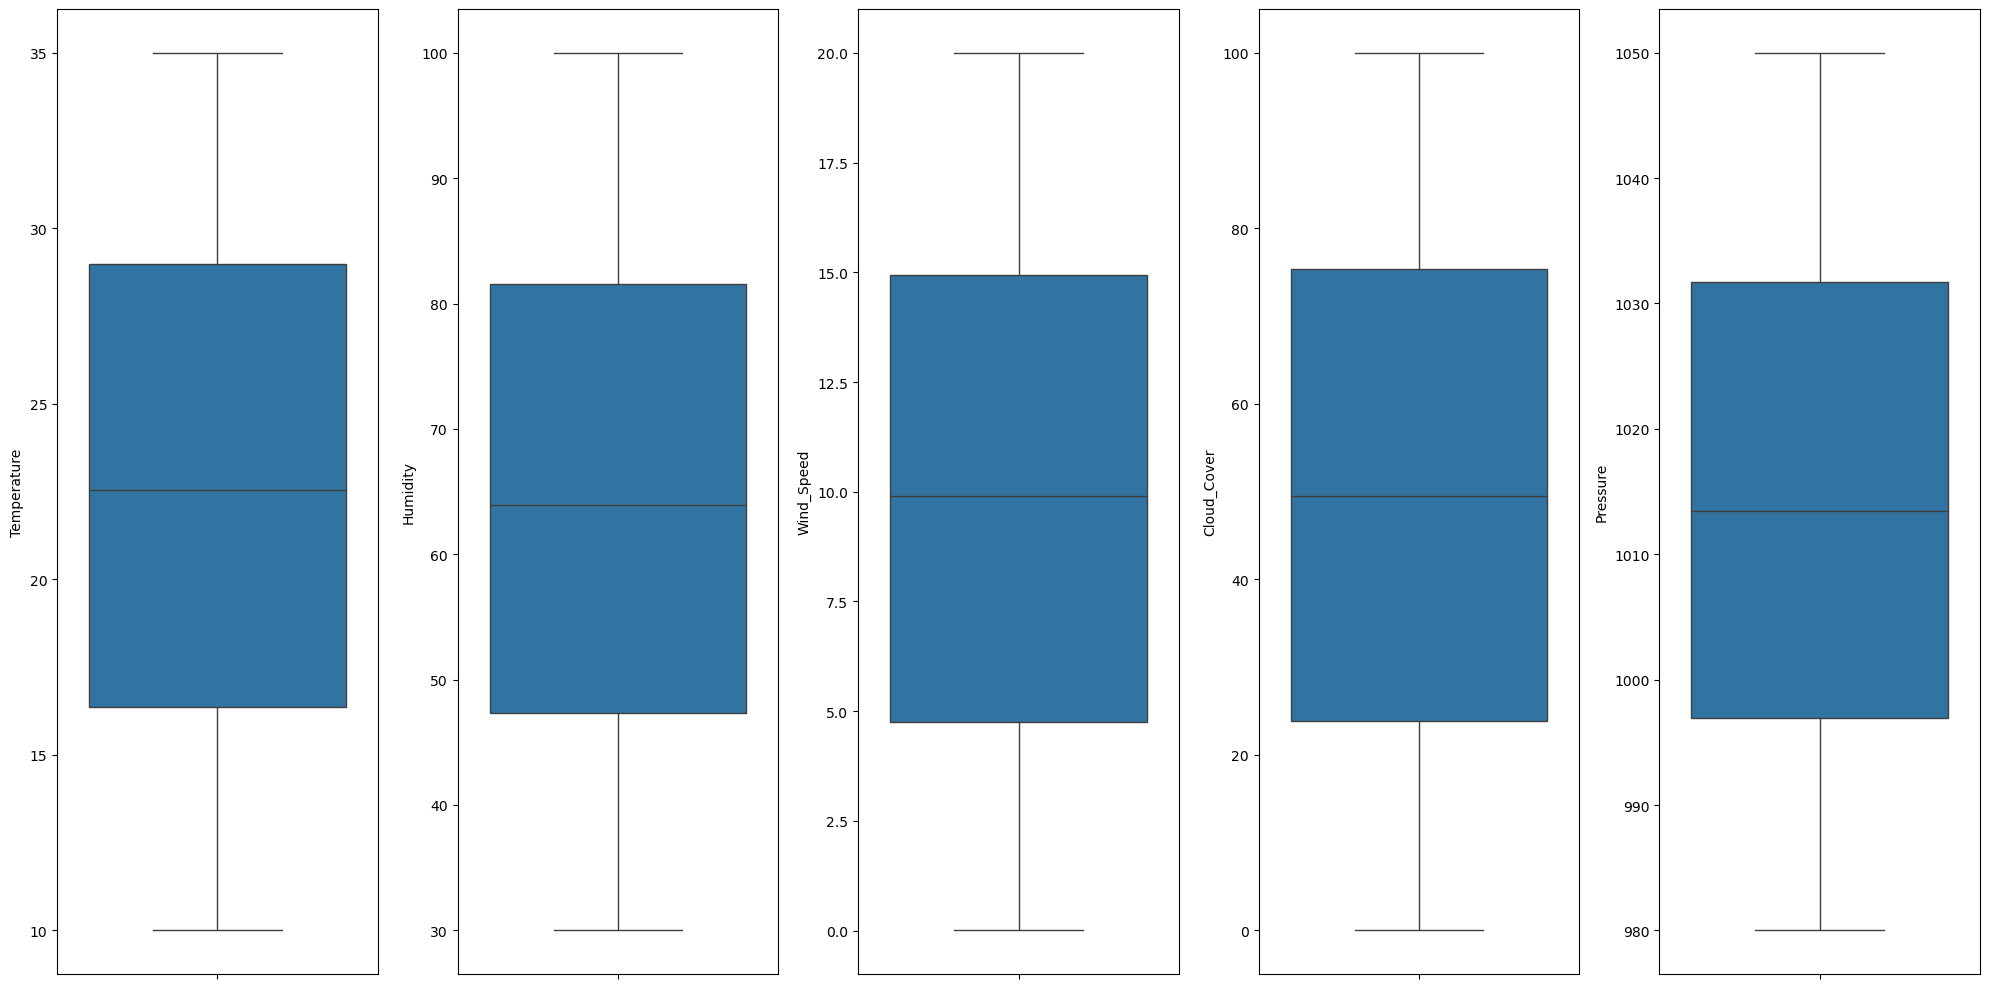

In [32]:
import seaborn as sns
fig=plt.figure(figsize=(20,10))
cont=[]
for col in df_num.columns:
    cont.append(col)
for i, name in enumerate(cont):
    ax=fig.add_subplot(1,len(cont), i+1)
    sns.boxplot(y=df_num[name], ax=ax)

fig.tight_layout()

In [33]:
df[df.duplicated()]

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain


In [34]:
target = df['Rain']
X = df[cont].values
y = target.values

In [35]:
target.value_counts()

Rain
0    2186
1     314
Name: count, dtype: int64

In [36]:
from sklearn.utils.class_weight import compute_class_weight
y = y.ravel()
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights = np.array([x for x in class_weights], dtype=np.float64)
class_weights

array([0.57182068, 3.98089172])

In [37]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [38]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=17)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, f1_score, RocCurveDisplay

In [40]:
tree = DecisionTreeClassifier(random_state=17)
np.mean(cross_val_score(tree, X_train, y_train, cv=5))

0.9948571428571429

In [41]:
knn = KNeighborsClassifier()
np.mean(cross_val_score(knn, X_train, y_train, cv=5))

0.9697142857142858

Настройка лучших параметров для Дерева решений

In [43]:
from sklearn.model_selection import GridSearchCV, cross_val_score
tree_params = {'max_depth': range(1,11),'max_features': range(2,6)}
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

In [44]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(2, 6)},
             verbose=True)

In [45]:
tree_grid.best_params_,  tree_grid.best_score_

({'max_depth': 6, 'max_features': 4}, 0.9965714285714287)

Настройка лучших параметров для KNN

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [48]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(1, 10)}
knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)

In [49]:
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=-1, param_grid={'knn__n_neighbors': range(1, 10)},
             verbose=True)

In [50]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 9}, 0.9662857142857142)

In [51]:
tree_valid_pred = tree_grid.predict(X_valid)
knn_valid_pred = knn_grid.predict(X_valid)

Метрики оценки качества Дерева решений

In [53]:
print('Accuracy: '+ str(accuracy_score(y_valid, tree_valid_pred)))
print('Precision: '+ str(precision_score(y_valid, tree_valid_pred)))
print('Recall: '+ str(recall_score(y_valid, tree_valid_pred)))
print('F1: '+ str(f1_score(y_valid, tree_valid_pred)))

Accuracy: 0.9986666666666667
Precision: 1.0
Recall: 0.9896907216494846
F1: 0.9948186528497409


In [54]:
tree_pred_proba = tree_grid.predict_proba(X_valid)
tree_pred_proba

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

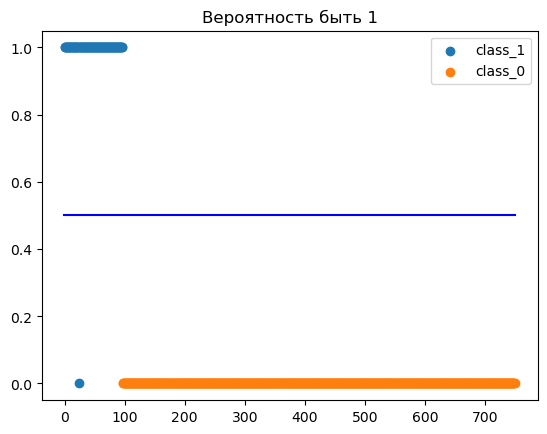

In [55]:
threshold = 0.5
class_1 = tree_pred_proba[:, 1][y_valid == 1]
class_0 = tree_pred_proba[:, 1][y_valid == 0]

plt.scatter(np.arange(len(class_1)), class_1, label='class_1')
plt.scatter(np.arange(len(class_1), len(class_1)+len(class_0)), class_0, label='class_0')
plt.plot([-0.2, len(tree_pred_proba[:, 1])], [threshold, threshold], c='b')
plt.title('Вероятность быть 1')
plt.legend();

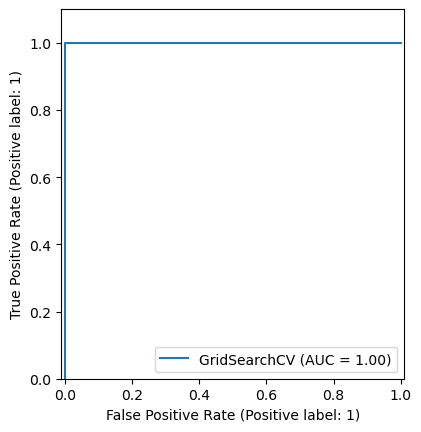

In [56]:
RocCurveDisplay.from_estimator(tree_grid, X_train, y_train)
plt.ylim([0, 1.1]);

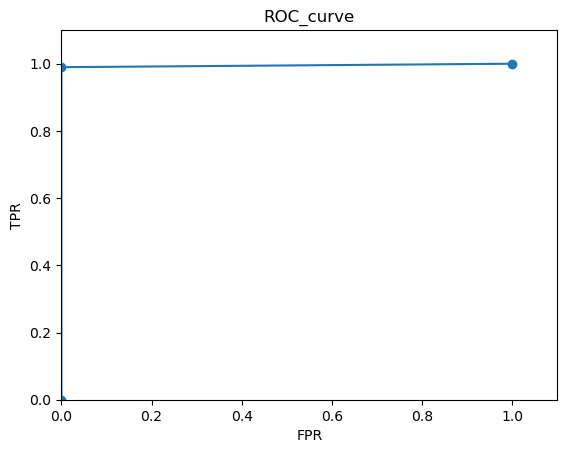

In [57]:
fprs, tprs, thr = roc_curve(y_valid, tree_pred_proba[:, 1])

plt.plot(fprs, tprs, marker='o')
plt.ylim([0, 1.1]);plt.xlim([0, 1.1])
plt.xlabel('FPR');plt.ylabel('TPR')
plt.title('ROC_curve');

Метрики оценки качества KNN

In [59]:
print('Accuracy: '+ str(accuracy_score(y_valid, knn_valid_pred)))
print('Precision: '+ str(precision_score(y_valid, knn_valid_pred)))
print('Recall: '+ str(recall_score(y_valid, knn_valid_pred)))
print('F1: '+ str(f1_score(y_valid, knn_valid_pred)))

Accuracy: 0.9693333333333334
Precision: 0.9111111111111111
Recall: 0.845360824742268
F1: 0.8770053475935828


In [60]:
knn_pred_proba = knn_grid.predict_proba(X_valid)
knn_pred_proba

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.77777778, 0.22222222]])

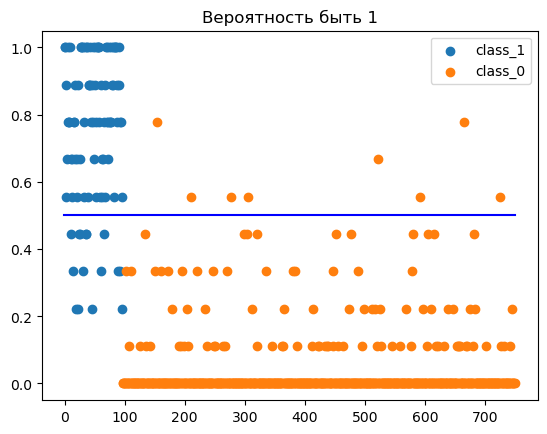

In [61]:
class_1 = knn_pred_proba[:, 1][y_valid == 1]
class_0 = knn_pred_proba[:, 1][y_valid == 0]

plt.scatter(np.arange(len(class_1)), class_1, label='class_1')
plt.scatter(np.arange(len(class_1), len(class_1)+len(class_0)), class_0, label='class_0')
plt.plot([-0.2, len(knn_pred_proba[:, 1])], [threshold, threshold], c='b')
plt.title('Вероятность быть 1')
plt.legend();

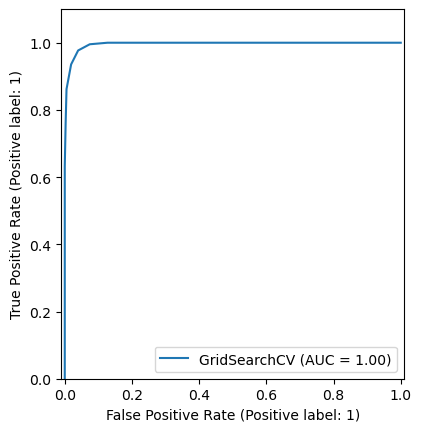

In [62]:
RocCurveDisplay.from_estimator(knn_grid, X_train, y_train)
plt.ylim([0, 1.1]);

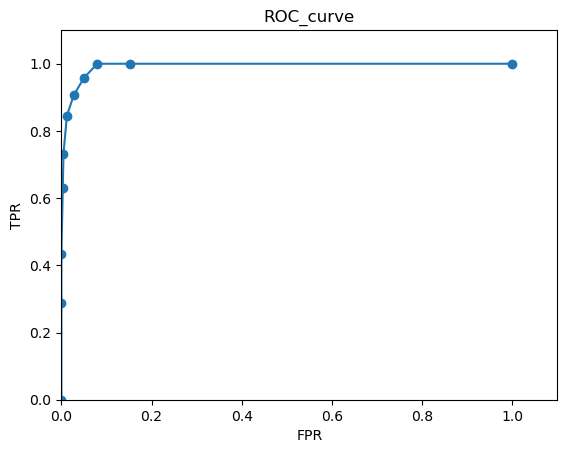

In [63]:
fprs, tprs, thr = roc_curve(y_valid, knn_pred_proba[:, 1])

plt.plot(fprs, tprs, marker='o')
plt.ylim([0, 1.1]);plt.xlim([0, 1.1])
plt.xlabel('FPR');plt.ylabel('TPR')
plt.title('ROC_curve');